In [20]:
import numpy as np
import matplotlib.pyplot as plt
import xmltodict
import pandas as pd

In [3]:
def e(p, t, tperp = 1):
    return -2*t*(np.cos(p)) - 2*tperp

def e1(p, t, tperp = 1):
    return -2*t*(np.cos(p)) + tperp


def Ef(N, L, t, tperp = 1):
    return -2*t*(np.cos(2 * N * np.pi/L)) - 2*tperp

def Ef1(N, L, t, tperp = 1):
    return -2*t*(np.cos(2 * N * np.pi/L)) + tperp

In [29]:
L = 40
t = 1
tperp = 1
p = np.arange(-10, 10, 0.01)

n = [0]
for b in range(40):
    h = b + 1
    n.append(h)
    n.append(- h)

In [30]:
all_energy = []
for x in range(0, 40):
    N = n[x]
    all_energy.append(Ef(N, L, t, tperp))
    all_energy.append(Ef1(N, L, t, tperp))
    all_energy.append(Ef1(N, L, t, tperp))
all_energy.sort()

In [39]:
import re
lst = []

In [40]:
with open('toblerone_tst.txt') as f:
    for i in f:
        dct = dict()
        try:
            dct['N']=int(re.findall('\d+',i)[0])
            dct['E'] = float(re.findall('-\d+.\d+',i)[0])
        except:
            print(i)
        lst.append(dct)

In [42]:
df = pd.DataFrame(lst)
df = df[df.E.notna()].sort_values(by=['N'])
df.head(60)

,N,E
1,1.0,-3.994132
0,2.0,-7.970692
2,3.0,-11.918083
3,4.0,-15.824876
7,5.0,-19.679881
15,6.0,-23.472212
17,7.0,-27.191351
14,8.0,-30.827210
13,9.0,-34.370188
19,10.0,-37.811232


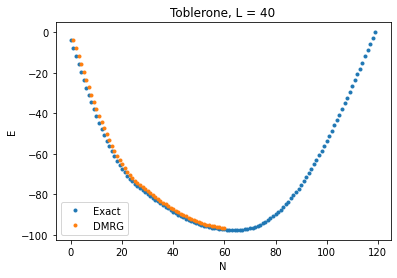

In [44]:
summ = 0
s = []
for i in range(len(all_energy)):
    summ = summ + all_energy[i]
    s.append(summ)

energy2 = []
for j in range(0, len(s)):
    energy2.append(s[j])

energies_alps = list(df['E'].values)
numbers_alps = list(df['N'].values)

q = np.arange(0, 120)
plt.plot(q, energy2, '.',label='Exact')
plt.plot(numbers_alps, energies_alps, '.',label='DMRG')
plt.xlabel('N')
plt.xlabel('N')
plt.ylabel('E')
plt.title("Toblerone, L = 40")
plt.legend()
plt.show()

In [45]:
energy2[39]

-87.67547253005966

In [46]:
energy2[79]

-90.82481894469879